Everything is up to date.
Columns after stripping: ['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth', 'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language', 'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province', 'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode', 'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders', 'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors', 'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser', 'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff', 'Rebuilt', 'Converted', 'CrossBorder', 'NumberOfVehiclesInFleet', 'SumInsured', 'TermFrequency', 'CalculatedPremiumPerTerm', 'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section', 'Product', 'StatutoryClass', 'StatutoryRiskType', 'TotalPremium', 'TotalClaims']
TransactionMonth dtype after conversion: datetime64[ns]
Sample TransactionMonth values: [Timestamp('2015-03-01 00:00:00'), Timestamp('2015-05-01 00

⠋ Checking graph



To track the changes with git, run:

	git add ../data/insurance_clean.csv.dvc

To enable auto staging, run:

	dvc config core.autostage true
Loaded DataFrame dtypes:
 UnderwrittenCoverID                  int64
PolicyID                             int64
TransactionMonth            datetime64[ns]
IsVATRegistered                       bool
Citizenship                         object
LegalType                           object
Title                               object
Language                            object
Bank                                object
AccountType                         object
MaritalStatus                       object
Gender                              object
Country                             object
Province                            object
PostalCode                           int64
MainCrestaZone                      object
SubCrestaZone                       object
ItemType                            object
mmcode                             float64
VehicleType    

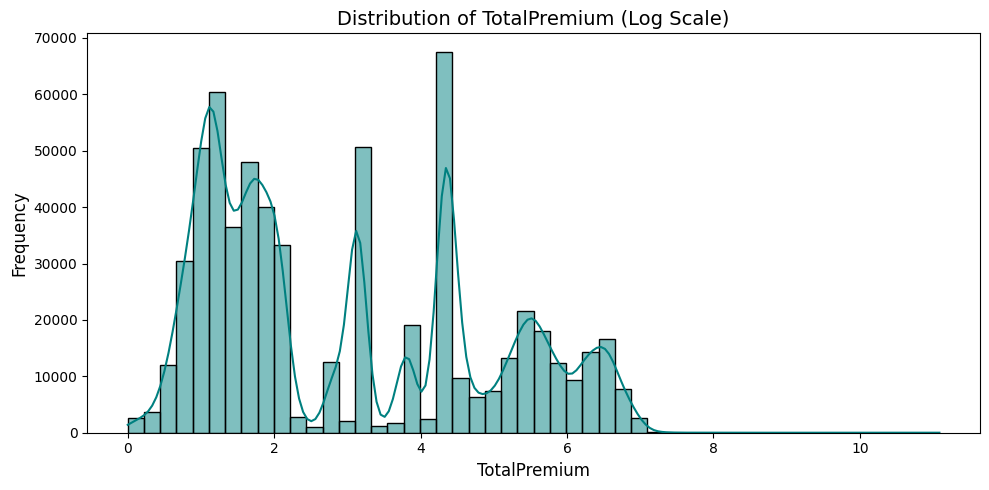

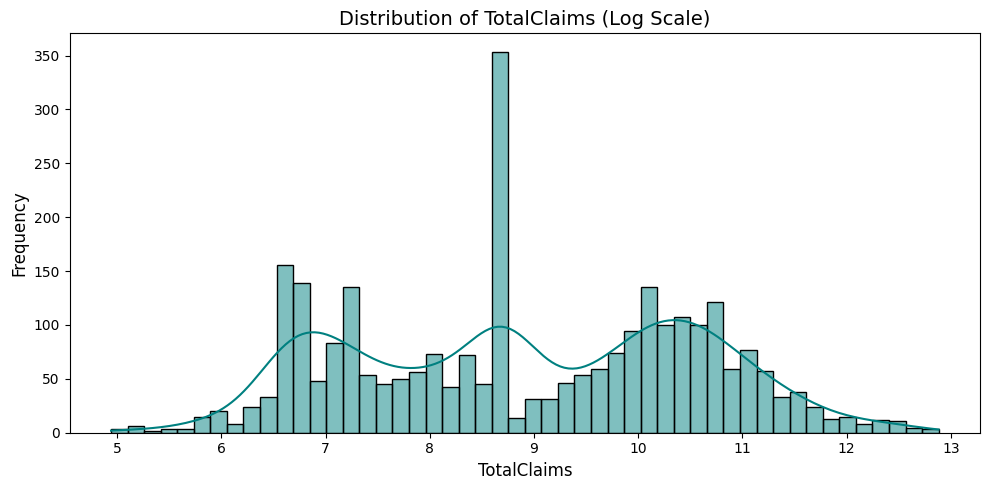

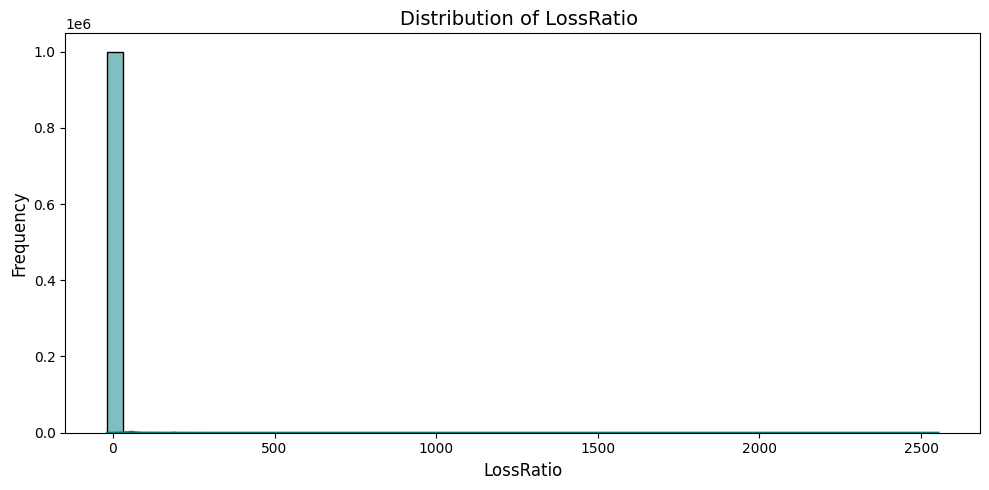

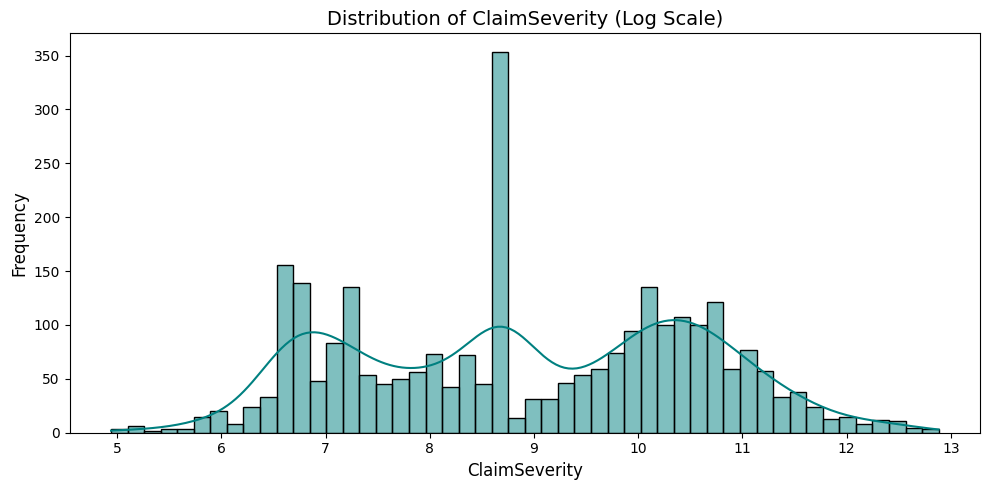

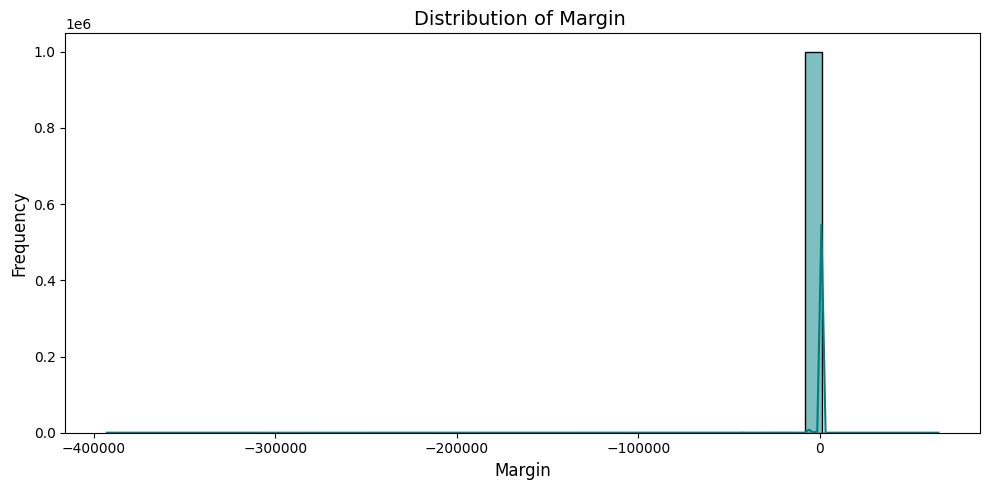

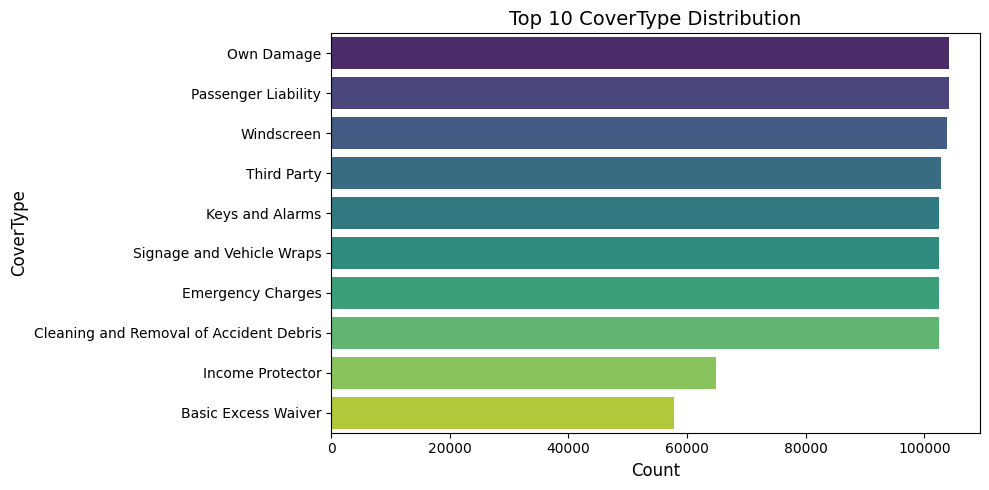

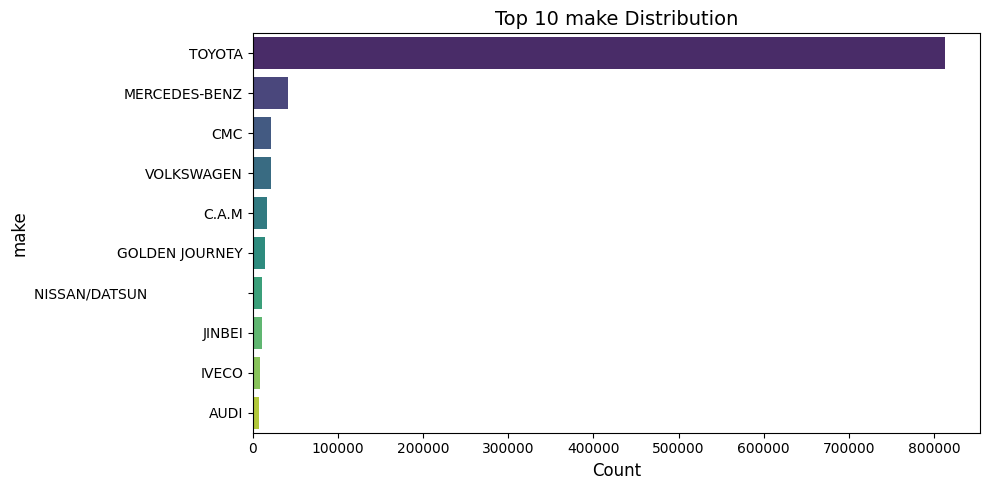

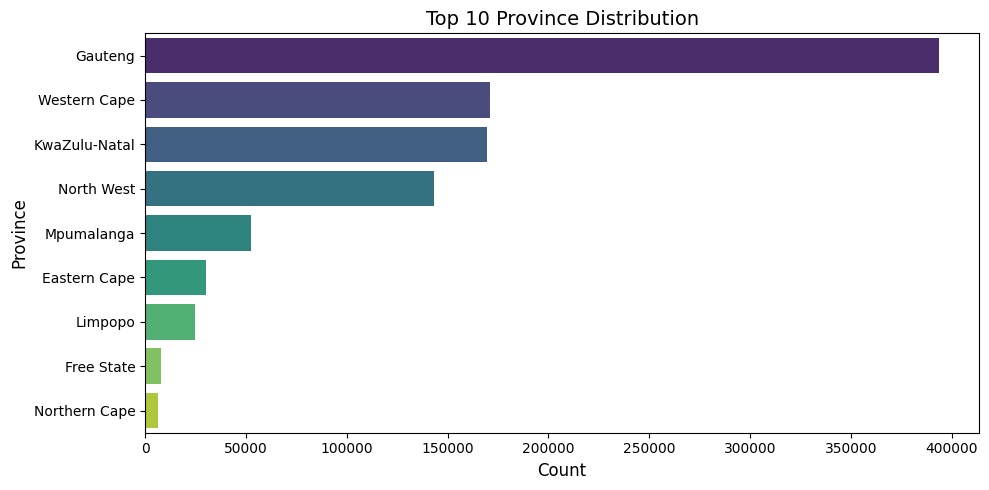

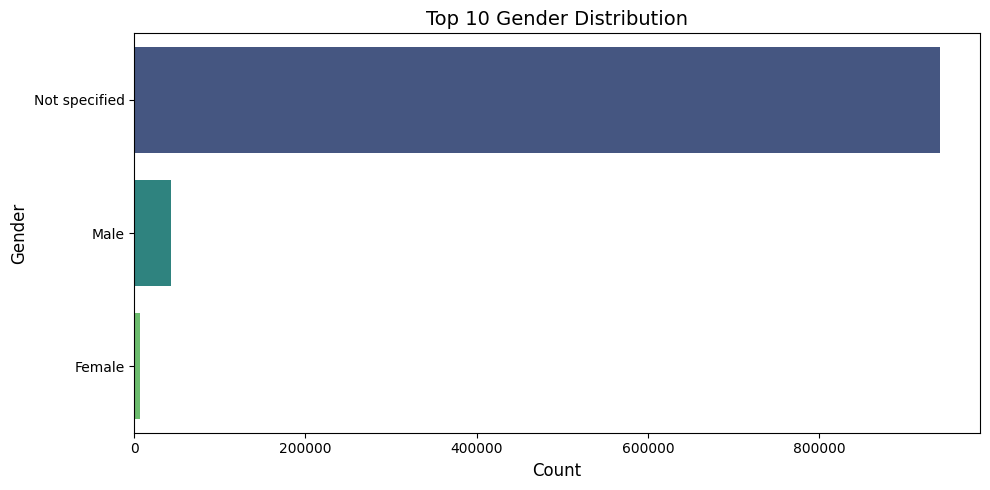

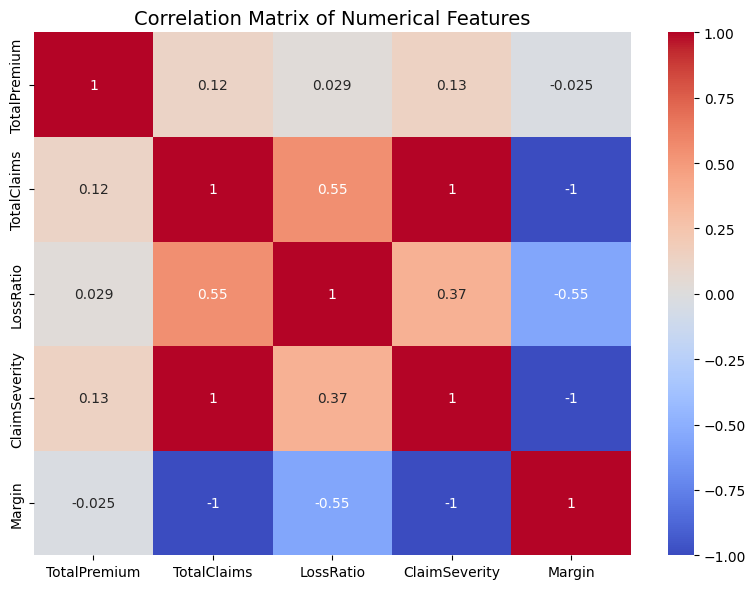

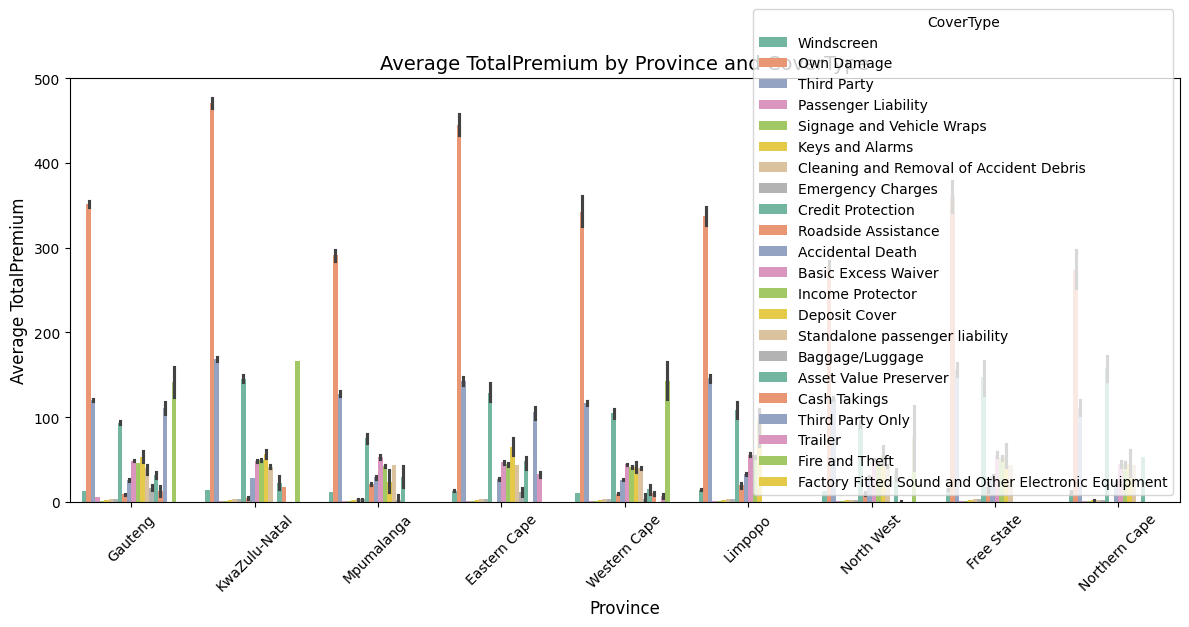

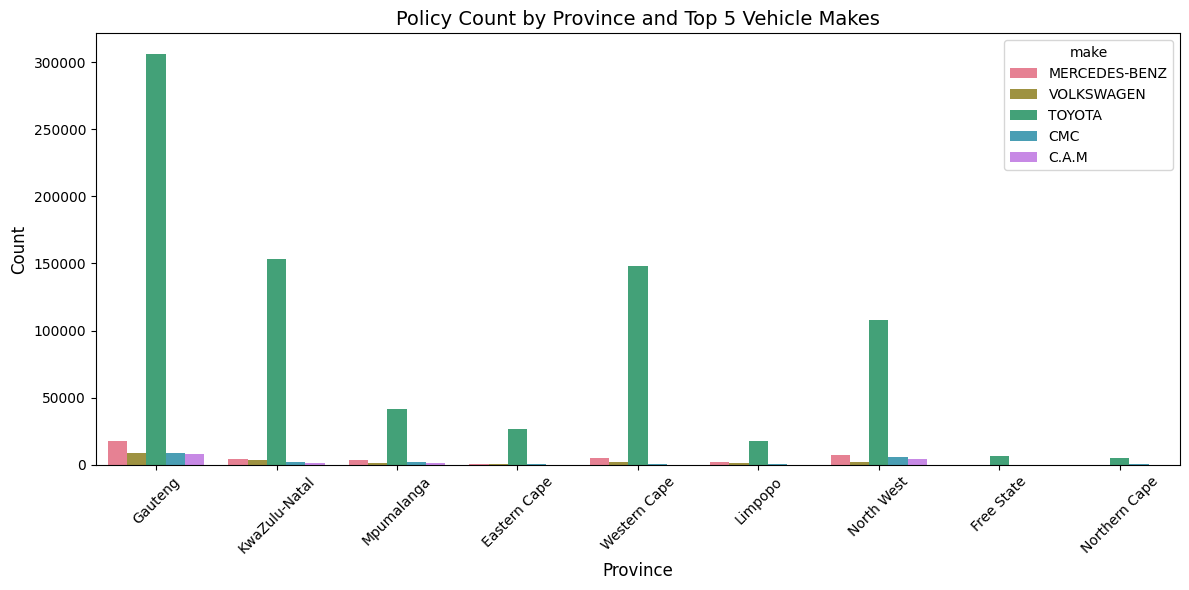

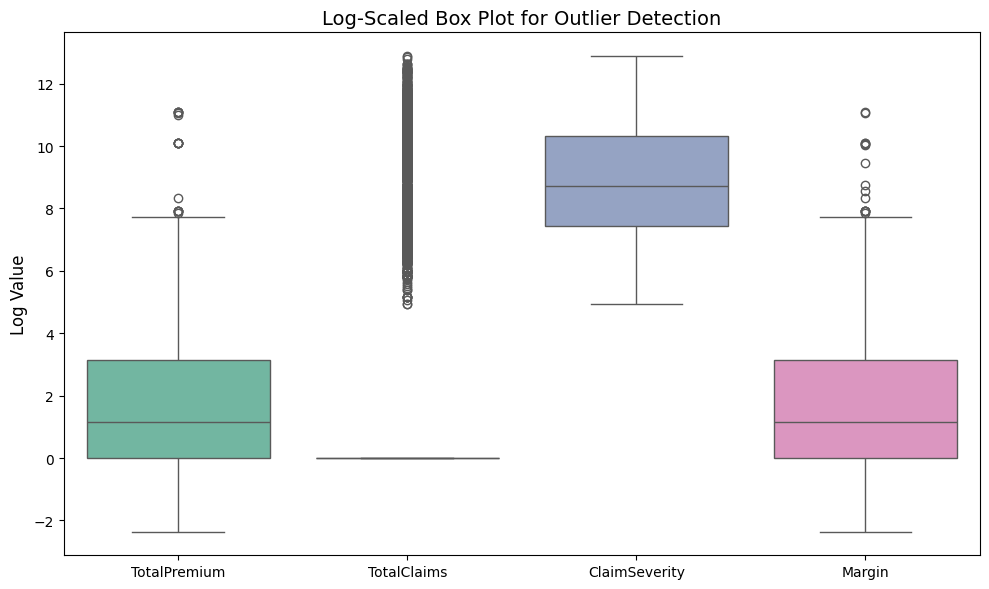

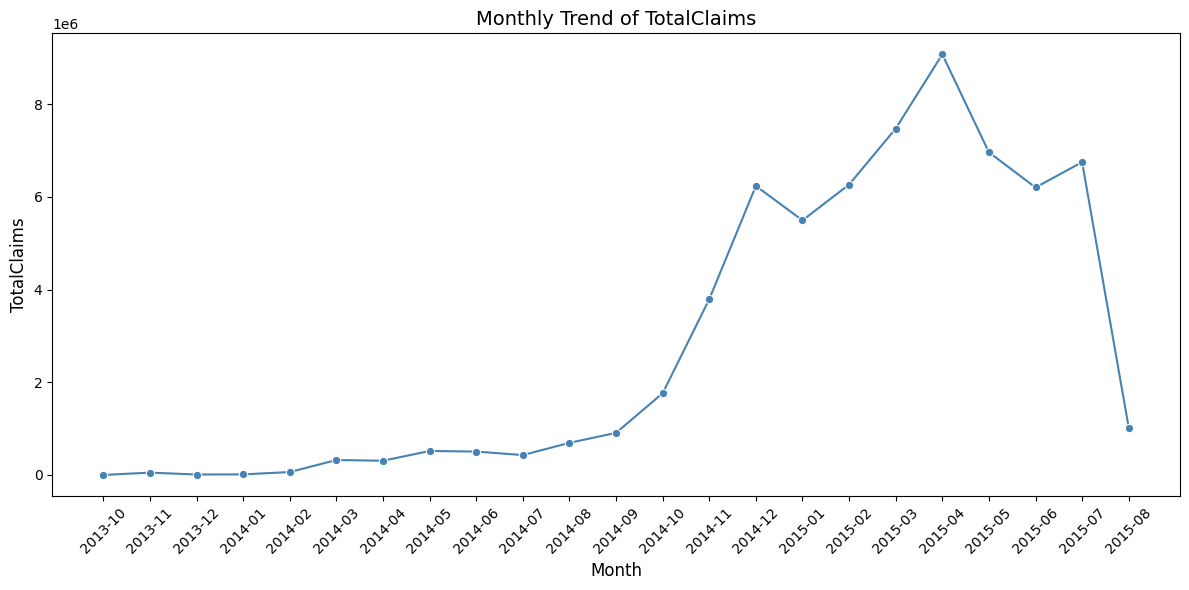

<Figure size 1200x800 with 0 Axes>

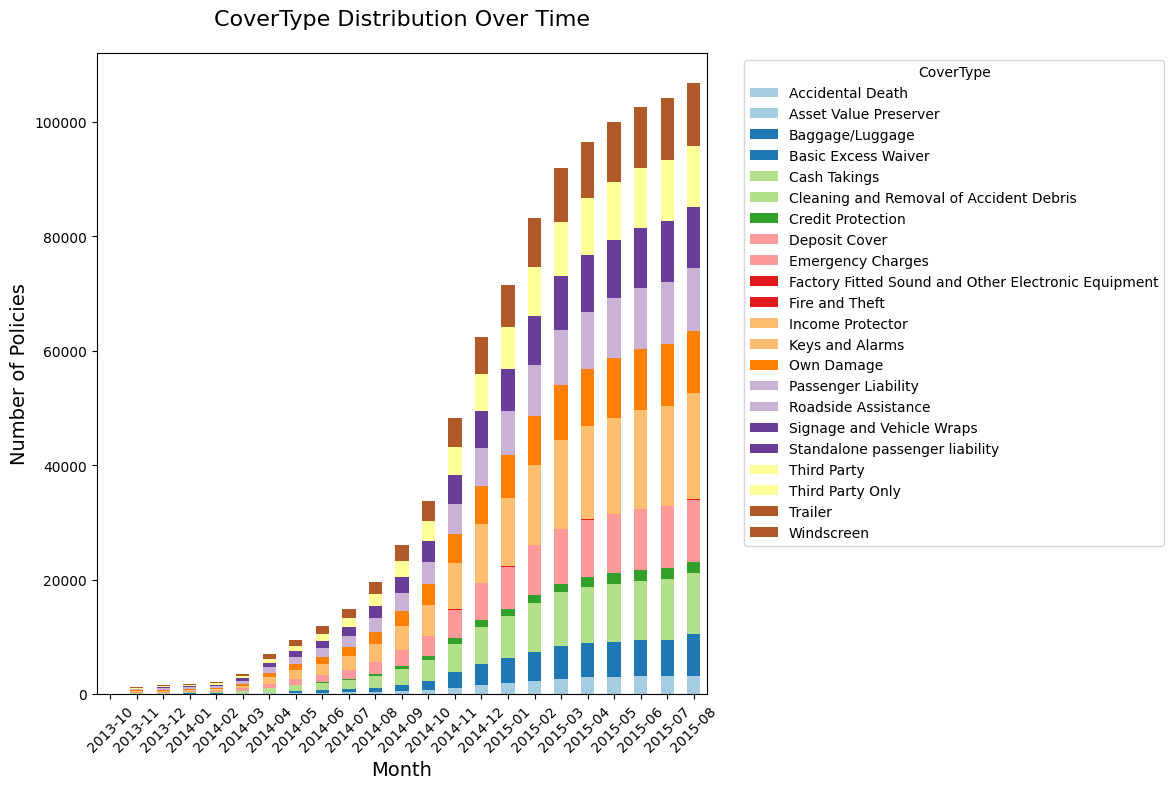

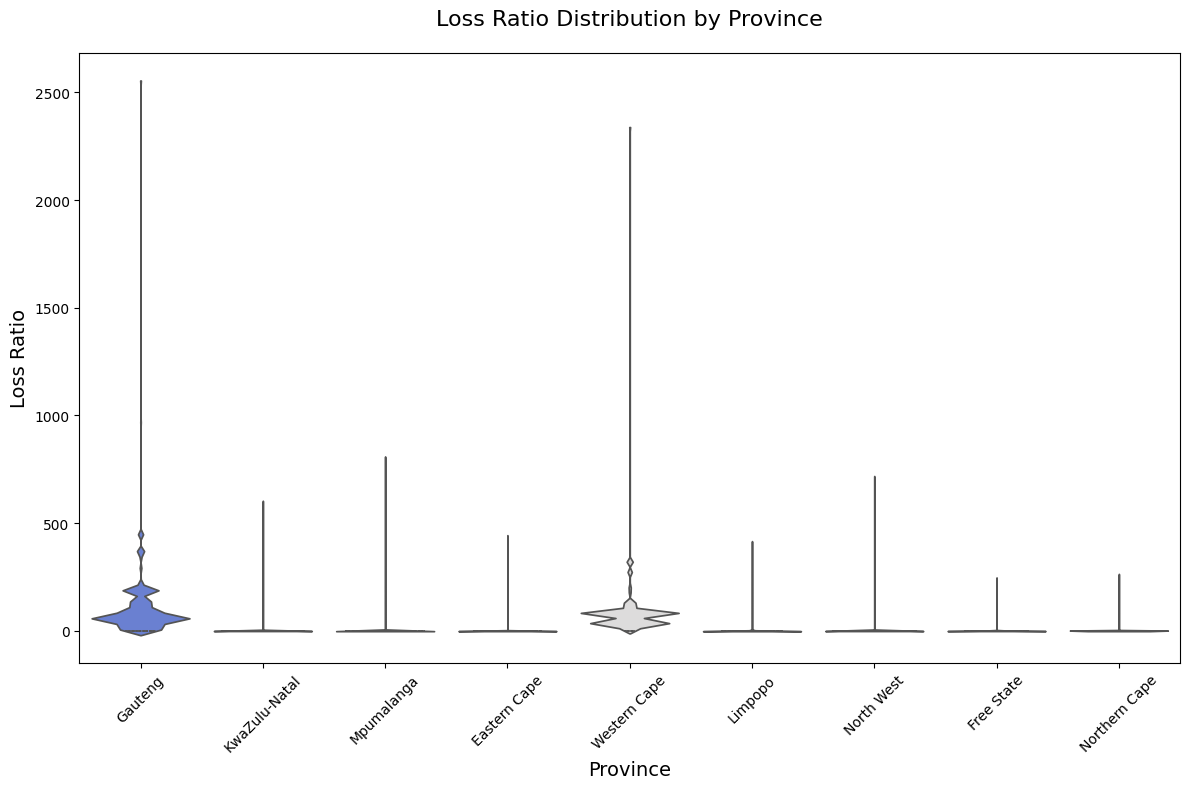


Hypothesis Testing Results:

Hypothesis: No risk differences across provinces
Metric: Claim Frequency
Test: Chi-squared
p-value: 0.0000
Reject H0: True
Details: {0: {'Eastern Cape': 30286, 'Free State': 8088, 'Gauteng': 392543, 'KwaZulu-Natal': 169298, 'Limpopo': 24769, 'Mpumalanga': 52590, 'North West': 142938, 'Northern Cape': 6372, 'Western Cape': 170426}, 1: {'Eastern Cape': 50, 'Free State': 11, 'Gauteng': 1322, 'KwaZulu-Natal': 483, 'Limpopo': 67, 'Mpumalanga': 128, 'North West': 349, 'Northern Cape': 8, 'Western Cape': 370}}

Hypothesis: No risk differences across provinces
Metric: Claim Severity
Test: Kruskal-Wallis
p-value: 0.0000
Reject H0: True
Details:             Multiple Comparison of Means - Tukey HSD, FWER=0.05             
    group1        group2      meandiff  p-adj     lower      upper    reject
----------------------------------------------------------------------------
 Eastern Cape    Free State   5137.1278    1.0 -34672.4563 44946.7119  False
 Eastern Cape     

0

In [1]:
# The project_root variable is already defined in this notebook, so you don't need to redefine it.
# Also, df and eda are already available, so you can skip preprocessing and EDA instantiation.


import sys
import os
import pandas as pd

# In Jupyter, __file__ is not defined. Use the notebook's directory instead.
notebook_dir = os.getcwd()
project_root = os.path.abspath(os.path.join(notebook_dir, ".."))
sys.path.append(project_root)

from src.preprocessing import InsurancePreprocessor
from src.insurance_eda import InsuranceEDA

# Pull data from DVC
os.system("dvc pull")

	# Data is already loaded and cleaned as df, and EDA object is already created as eda.
processor = InsurancePreprocessor("../data/MachineLearningRating_v3.txt", sep="|")
processor.run_all("../data/insurance_clean.csv")

# Track output with DVC
os.system("dvc add ../data/insurance_clean.csv")

# Load cleaned data with TransactionMonth as datetime
df = pd.read_csv("../data/insurance_clean.csv", parse_dates=["TransactionMonth"])
# Debug: Check column types and sample data
print("Loaded DataFrame dtypes:\n", df.dtypes)
print("Sample TransactionMonth values:\n", df["TransactionMonth"].head())
print("Number of NaT values in TransactionMonth after loading:", df["TransactionMonth"].isnull().sum())

# Run EDA
eda = InsuranceEDA(df)
eda.descriptive_stats()
eda.data_types()
eda.check_missing_values()
eda.plot_univariate_distributions()
eda.bivariate_analysis()
eda.geo_trends()
eda.boxplot_outliers()
eda.time_trend("TotalClaims")
eda.creative_plots()
eda.hypothesis_testing()

# Push data to DVC remote
os.system("dvc push")